# **1. Import libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **2. Load dataset**

The creditcard.csv dataset contains details of 284,807 transactions out of which 492 are fraudulent transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

*   Data has 31 features from V1-V28 & Time, Amount and Class

* Input features: V1-V28, Time and Amount

* **Target variable: Class**

In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

Display the top 15 rows of the dataframe

In [ ]:
# Display first few rows
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



The command pd.options.display.max_columns = None in Pandas sets the maximum number of columns to display in the output to unlimited.
This is useful when you're working with DataFrames that have many columns, ensuring you can see all of them without truncation.

In [ ]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **3. Exploratory Data Analysis (EDA)**

We now label the class feature as below

* Class==1 as Fraud
* Class==0 as Normal

In [ ]:
# Label the class
Fraud = df[df.Class == 1]
Normal = df[df.Class == 0]

Let us count the number of transactions of each Class value in the specified target column.

* Normal Transactions (Class: 0) = 284,315
* Fraudulent Transactions (Class: 1) = 492


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


### Print the shape of the dataframe

In [ ]:
# Display dataset shape
df.shape

(284807, 31)

In [ ]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


### Information about data

To get information about the DataFrame, including data types and non-null values count, we can use the info() method


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Summary statistics

To print summary statistics of the DataFrame (e.g., mean, min, max)

In [ ]:
#For numerical columns
df_summary_numeric=df.describe()
df_summary_numeric

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **4**. **Model Selection**

 PyCaret is a Python library designed to make machine learning easy and accessible. Think of it as a tool that helps you quickly build and test machine learning models without writing a lot of code.

Here’s a simple breakdown:

* Low-Code: You can perform complex machine learning tasks with just a few lines of code.
* End-to-End: It handles everything from data preprocessing to model training, evaluation, and deployment.
* Modules: PyCaret is organized into different modules, each for a specific type of task like classification, regression, clustering, etc. For example, the classification module helps you build models to classify data into categories.
* Automation: It automates many steps in the machine learning workflow, making it faster and easier to experiment with different models

In [ ]:
#!pip install pycaret


In [ ]:
#!pip install --upgrade pycaret


This setup will handle several key aspects of data preprocessing effectively.


In [ ]:
from pycaret.classification import *

# Initialize the setup
set_ini = setup(
    data=df,  # The DataFrame containing your dataset
    target='Class',  # The target column for prediction
    train_size=0.8,  # Proportion of the dataset to include in the train split
    session_id=123,  # Seed for reproducibility
    fix_imbalance=True
)


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(511864, 31)"
5,Transformed train set shape,"(454902, 31)"
6,Transformed test set shape,"(56962, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Compare multiple models
best_model = compare_models()

# Print the best model
print(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:52:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9695,0.8426,0.8908,0.8653,0.8651,0.8658,449.8320
dt,Decision Tree Classifier,0.9980,0.9077,0.8171,0.4505,0.5803,0.5794,0.6056,55.6720
nb,Naive Bayes,0.9925,0.9676,0.7643,0.1576,0.2611,0.2590,0.3447,1.0210
lr,Logistic Regression,0.9897,0.9832,0.8958,0.1357,0.2349,0.2326,0.3453,51.1870
ada,Ada Boost Classifier,0.9893,0.9779,0.8882,0.1284,0.2242,0.2219,0.3352,156.0630
ridge,Ridge Classifier,0.9883,0.9729,0.8250,0.1118,0.1969,0.1945,0.3011,1.2660
qda,Quadratic Discriminant Analysis,0.9750,0.9678,0.8806,0.0578,0.1085,0.1056,0.2219,2.4870
knn,K Neighbors Classifier,0.9443,0.7450,0.5004,0.0155,0.0300,0.0268,0.0805,118.6560
svm,SVM - Linear Kernel,0.8797,0.9356,0.8471,0.0835,0.1427,0.1400,0.2307,60.2490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9697,0.8401,0.9069,0.8719,0.8717,0.8725,57.8380
rf,Random Forest Classifier,0.9995,0.9695,0.8426,0.8908,0.8653,0.8651,0.8658,449.8320
xgboost,Extreme Gradient Boosting,0.9995,0.9817,0.8426,0.8562,0.8484,0.8481,0.8486,10.5900
lightgbm,Light Gradient Boosting Machine,0.9992,0.9629,0.8375,0.7402,0.7855,0.7851,0.7868,35.7800
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0100
dt,Decision Tree Classifier,0.9980,0.9077,0.8171,0.4505,0.5803,0.5794,0.6056,55.6720
gbc,Gradient Boosting Classifier,0.9944,0.9768,0.8781,0.2208,0.3522,0.3504,0.4381,789.4430
nb,Naive Bayes,0.9925,0.9676,0.7643,0.1576,0.2611,0.2590,0.3447,1.0210
lr,Logistic Regression,0.9897,0.9832,0.8958,0.1357,0.2349,0.2326,0.3453,51.1870
ada,Ada Boost Classifier,0.9893,0.9779,0.8882,0.1284,0.2242,0.2219,0.3352,156.0630


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [ ]:
# Make predictions on the test data
predictions = predict_model(best_model)
print(predictions.head())

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9994,0.9611,0.7449,0.8690,0.8022,0.8019,0.8043


            Time        V1        V2        V3        V4        V5        V6  \
24729    33355.0  1.297282 -1.176191  0.450595 -1.453381 -0.921556  0.816109   
124222   77220.0  1.041322 -0.252484  0.924527  0.379391 -0.548263  0.568597   
214211  139579.0 -0.570442  1.137299 -0.601386 -0.458304  0.593223 -0.507870   
64868    51339.0  1.232836 -0.187215  0.246974  0.601609 -0.320217  0.155374   
116182   74173.0 -0.751012  0.281865  2.937944  1.124178 -0.549099 -0.313871   

              V7        V8        V9  ...       V23       V24       V25  \
24729  -1.238829  0.333164 -1.865569  ...  0.198480 -0.662771  0.021905   
124222 -0.666701  0.391843  0.247487  ...  0.107589 -0.276678 -0.052496   
214211  0.980228  0.359346 -0.514617  ... -0.092854  0.766815 -0.065340   
64868  -0.349593  0.181849  0.646119  ... -0.188017 -0.477295  0.613008   
116182  0.108175  0.018034  0.316367  ... -0.230472  0.688505  0.239638   

             V26       V27       V28     Amount  Class  prediction_l

**evaluate_model()** function provides a comprehensive set of visualizations and metrics to assess the performance of the specified model.

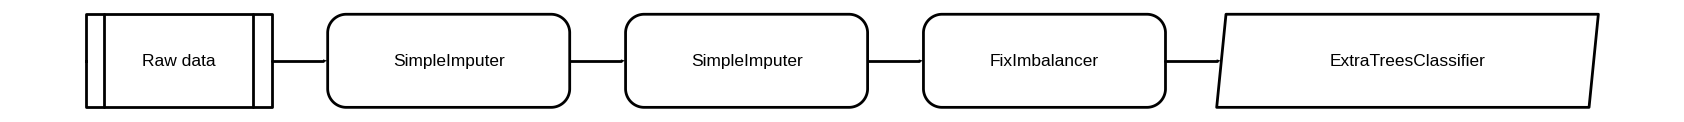

In [ ]:
evaluate_model(best_model)

In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

# **5. Visualization**

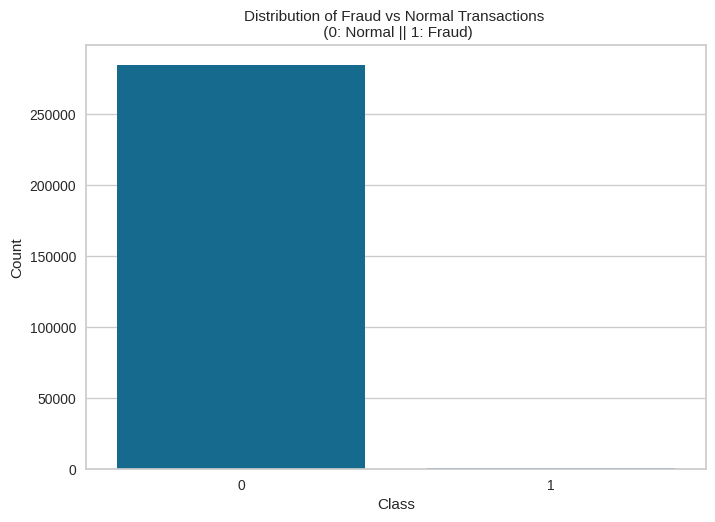

In [ ]:
# Visualize the distribution of the target variable

value_counts = df['Class'].value_counts()

Class_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.show()


In [ ]:
amount_summary = Fraud['Amount'].describe()

# Count of fraudulent transactions
fraud_count = Fraud.shape[0]
print(fraud_count)

492


In [ ]:
amount_summary = Normal['Amount'].describe()

# Count of Normal transactions
normal_count = Normal.shape[0]
print(normal_count)

284315


Let us visualize the distribution of amount for "Fraud" Transactions via Histogram.



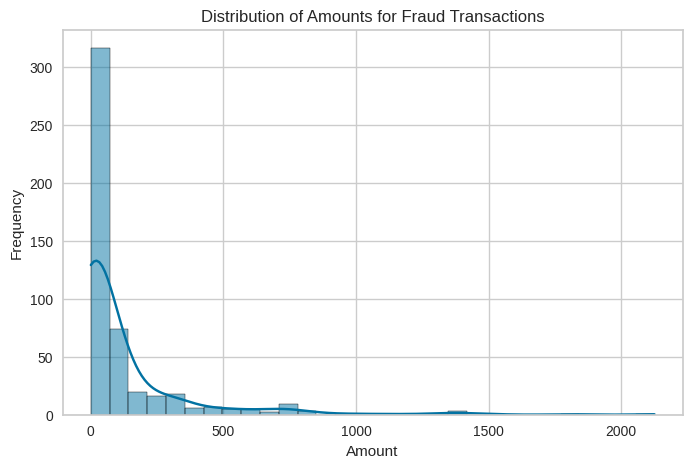

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(Fraud['Amount'], bins=30, kde=True)
plt.title('Distribution of Amounts for Fraud Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Key Observations:
* **High Frequency of Small Amounts**: Most fraud transactions involve smaller amounts, as indicated by the highest bar (just above 300) for amounts close to zero.

* The fraud transaction amounts seems less than 2500.

* **Decreasing Frequency with Higher Amounts**: As the transaction amount increases, the frequency of fraud transactions decreases.


---



In [ ]:
amount_more = 0
amount_less = 0

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1

print(amount_more)
print(amount_less)

449
284358


In [ ]:
percentage = (amount_less/df.shape[0])*100
percentage

99.84234938045763

Hence, we observe that the 99.84% of transactions amount to less than 2500.


---

Let us see how many of these are fraud and others legitimate


In [ ]:
# Classified transactions
fraud = 0
normal = 1

for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"]<2500):
        if(df.iloc[i]["Class"] == 0):
            normal += 1
        else:
            fraud+=1

print(fraud)
print(normal)

492
283867


After which we can conclude that since the number of fraud transaction below the amount of 2500 is equivalent to the number of total fraud transactions, all fraud transactions therefore are less than 2500.

### **Correlation Matrix**

A correlation matrix is a table showing the correlation coefficients of many variables, most of them in one common data set. Each cell of the matrix expresses the correlation between any pair of variables, which can be valuable in determining relationships between them.

**Key Points about Correlation:**

A correlation coefficient- is a numerical measure of the strength and direction of a linear relationship between two variables, usually from -1 to +1.

* 1: Perfect positive correlation (as one variable increases, the other one increases).
* 0: Nothing; no correlation (the variables are independent in linearity).
* -1: Perfect negative correlation (as one variable increases, the other decreases).

A heatmap - highly effective way of presenting the correlation matrix and making basic relationships between the variables quickly assessed without going into tedious readings of numerical terms.

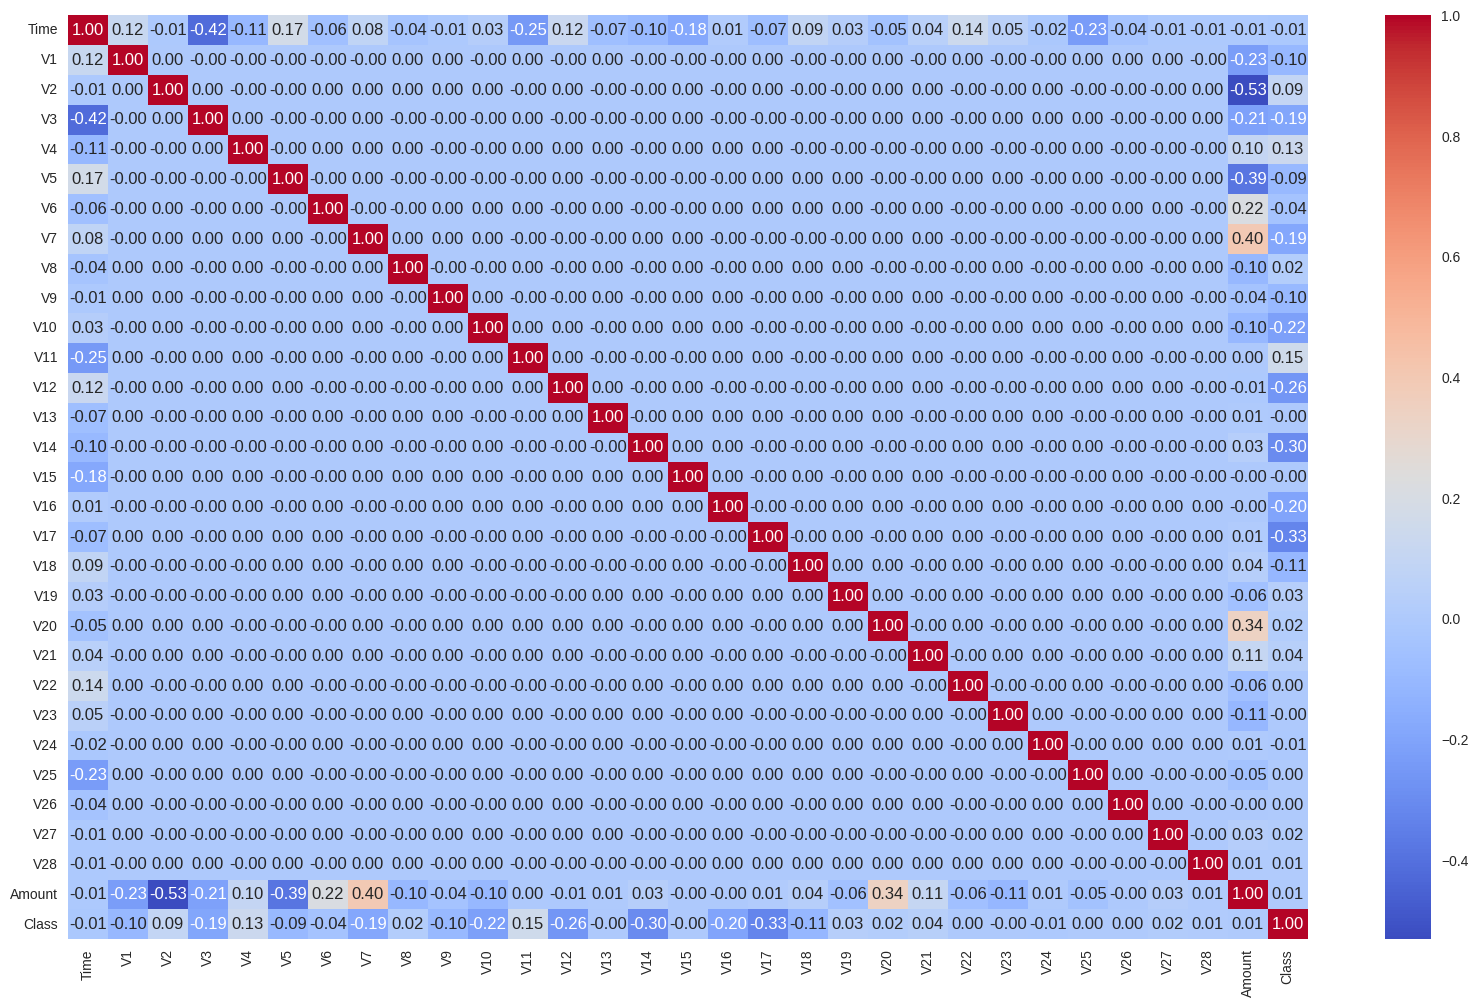

In [ ]:
plt.figure(figsize=(20, 12))
corr = df.corr(numeric_only=True)
correlation_heatmap=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()


### **Histograms of all numerical columns**

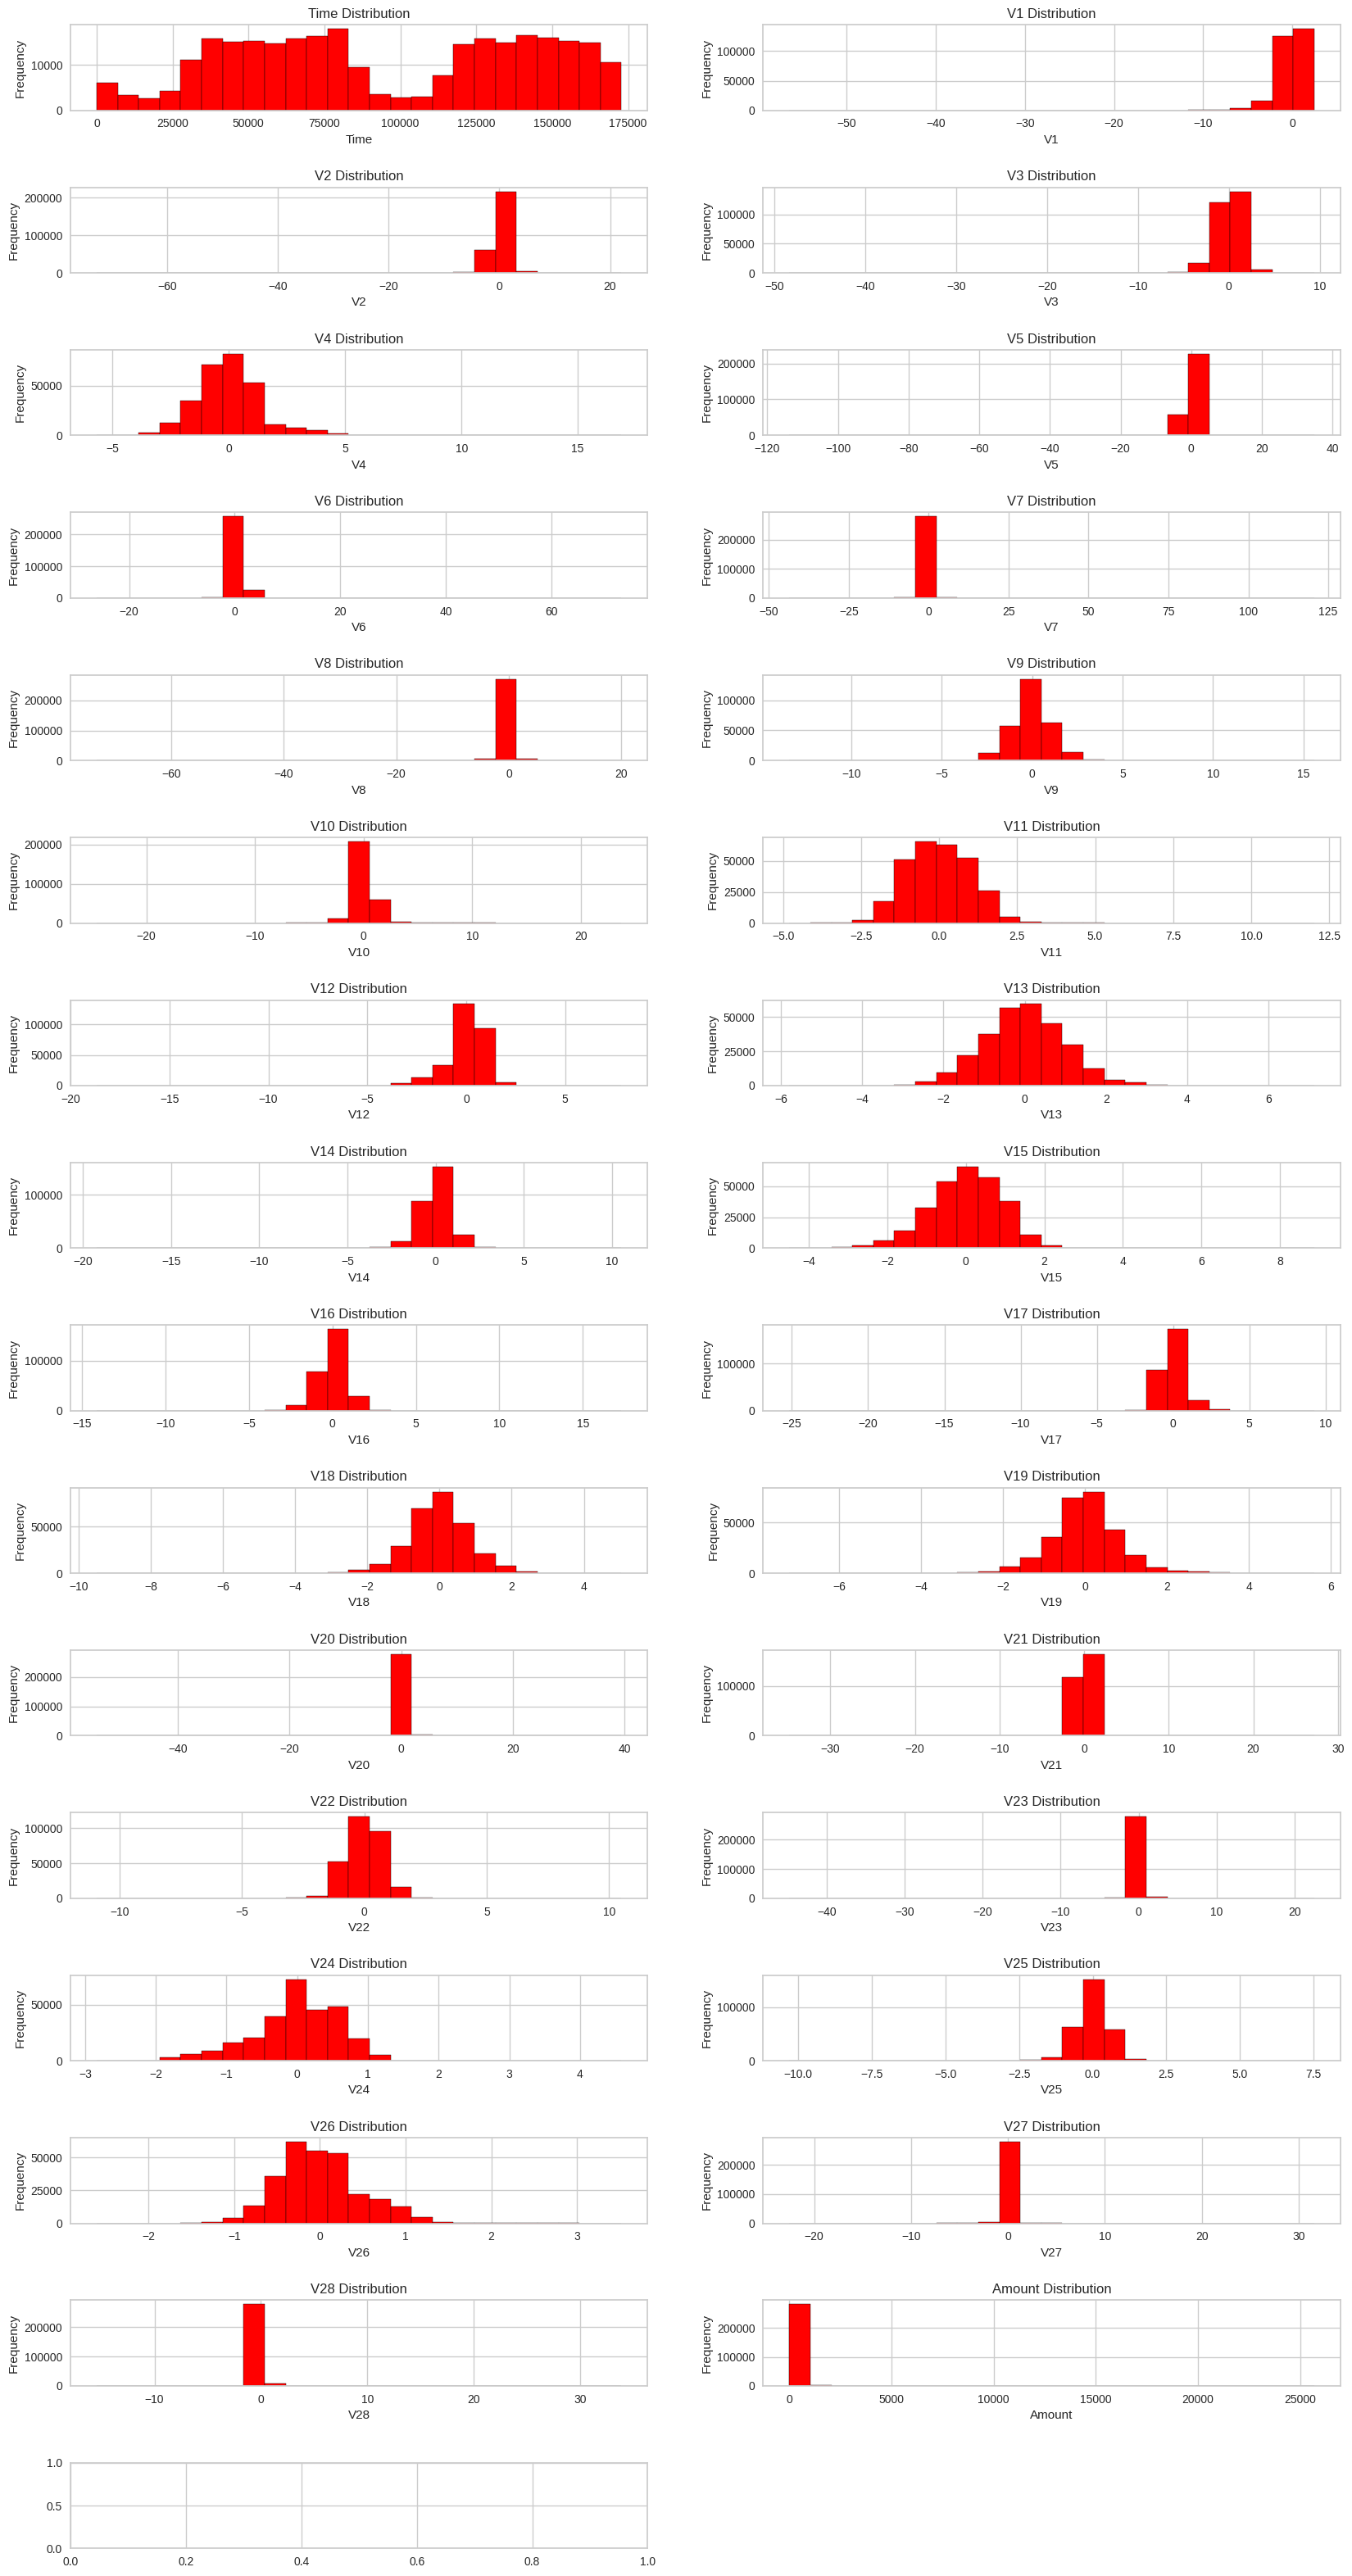

In [ ]:
# Define the number of columns and rows for subplots
num_cols = df.shape[1]  # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1  # Calculate the number of rows needed for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 40))
fig.subplots_adjust(hspace=0.9)  # Adjust vertical spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if column == 'Class':
        continue  # Skip the target variable if it's in the DataFrame
    ax = axes[i]
    ax.hist(df[column], bins=25, color='Red', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)  # set the label for x-axis
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Show the subplots
plt.show()

### **Target column preprocessing**

In [ ]:
df['Class'] = df['Class'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
Class_distribution_pp = df['Class'].value_counts()
print("Target variable distribution after preprocessing:\n", Class_distribution_pp)

Target variable distribution after preprocessing:
 Class
0    284315
1       492
Name: count, dtype: int64


# **6. Data cleaning**

* Remove duplicates
* Handling missing values if any
* Removal of outliers

### Check for duplicate rows and drop them

In [ ]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

1081


In [ ]:
df = df.drop_duplicates()

In [ ]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


### Checking for null values

In [ ]:
# checking for null values

null_value_percentage = df.isnull().sum()/len(df)
print(null_value_percentage)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


### **Relationship between Amount and each Class**

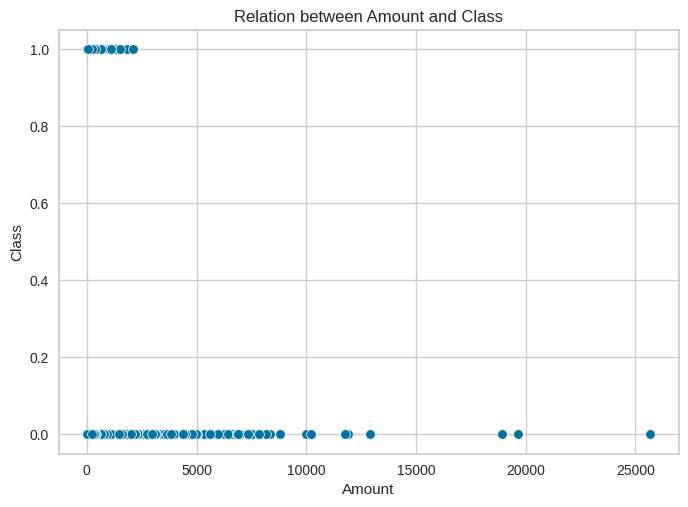

In [ ]:
adr_scatter = sns.scatterplot(data = df,x = 'Amount',y = 'Class')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Relation between Amount and Class')
plt.show()

As we can predict from the above scatterplot, the Amount variable has some outliers.

### **Removal of Outliers**

An outlier is a data point that significantly deviates from the rest of the data in the column. It can be unusually high or low in value compared to the majority of data points



Let us use the "Box plot" to plot the outliers.

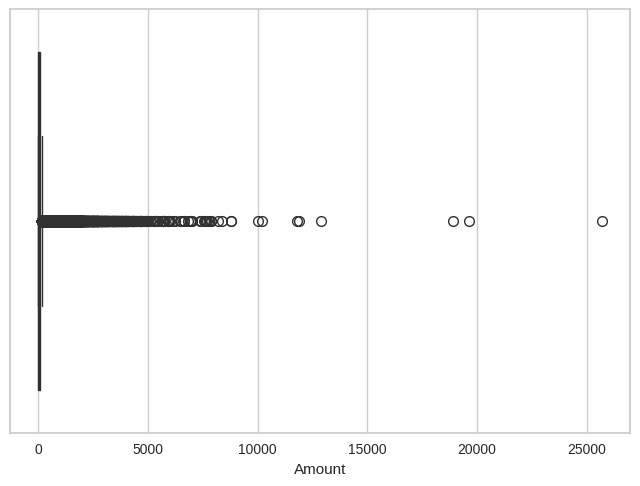

In [ ]:
# Box plot to identify outliers
sns.boxplot(data=df, x='Amount')
plt.show()

In [ ]:
import pandas as pd

# Calculate the IQR for 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]


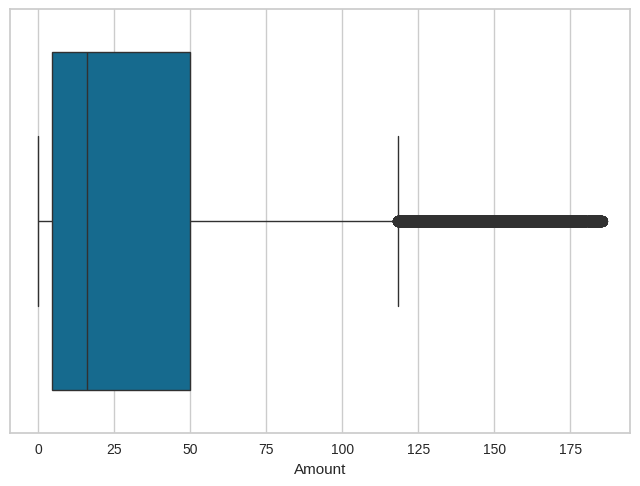

In [ ]:
# Box plot to identify outliers
sns.boxplot(data=df, x='Amount')
plt.show()

# **7. Split data into train and test sets**

Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (201632, 30)
X_test shape: (50409, 30)
y_train shape: (201632,)
y_test shape: (50409,)


# **8. Dealing with Imbalanced data**

How SMOTE Works

* Identify Minority Class: SMOTE identifies the instances in the minority class. Choose Neighbors: For each instance in the minority class, it selects a number of its nearest neighbors (typically using Euclidean distance).
* Generate Synthetic Samples: New samples are created by interpolating between the instance and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (402660, 30)
y_resampled shape: (402660,)


# **9.** **Scaling**

Scaling is a crucial preprocessing step in machine learning and data analysis.It helps improve model performance, ensures features contribute equally and helps us achieve more reliable and interpretable models.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# **10. Train the Model**

We have used pycaret module to identify the best model for this project. The following are the 5 promising models based on accuracy metric:

1. Random Forest Classifier
2. Extreme Gradient Boosting (XGBoost)
3. Extra Trees Classifier
4. Logistic Regression
5. Light Gradient Boosting Machine (LightBGM)

Let us work with above models, and visualize the results.

## **Model 1 - Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Make predictions on the resampled training set
y_train_pred = rf_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    201330
           1       1.00      0.99      1.00    201330

    accuracy                           1.00    402660
   macro avg       1.00      1.00      1.00    402660
weighted avg       1.00      1.00      1.00    402660

Training Confusion Matrix:
 [[201223    107]
 [  1662 199668]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.67      0.88      0.76        84

    accuracy                           1.00     50409
   macro avg       0.84      0.94      0.88     50409
weighted avg       1.00      1.00      1.00     50409

Testing Confusion Matrix:
 [[50289    36]
 [   10    74]]


In [ ]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9956067153429693
Training Precision :  0.999464397447128
Training Recall Score :  0.9917448964386828


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9990874645400623
Testing Precision :  0.6727272727272727
Testing Recall Score :  0.8809523809523809


Here, we can see, the model is performing moderately well on unseen data, however there is scope for improvement. In order to enhance our model performance, we will perform Threshold Tuning.

### **Threshold Adjustment**
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class and help enhance the performance of the model.

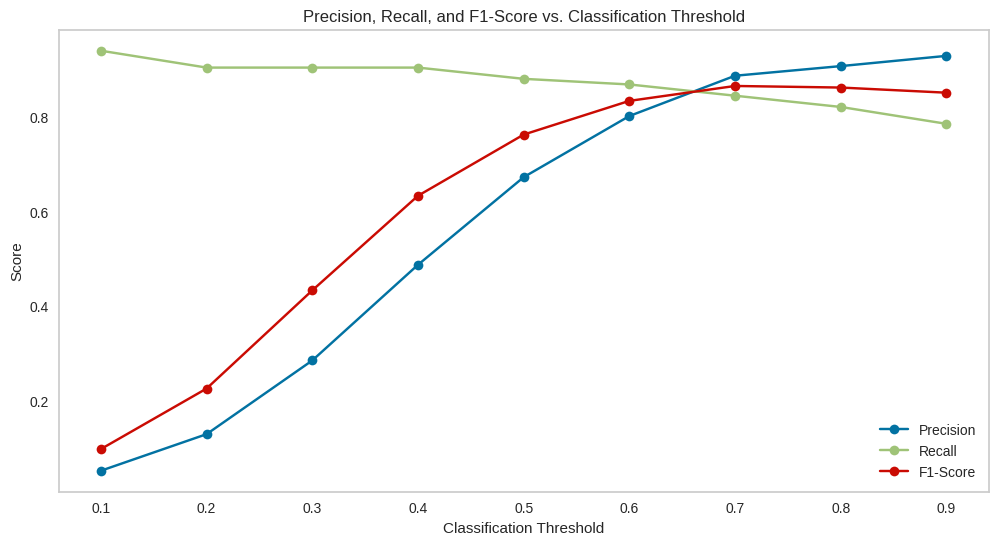

Best threshold based on F1-score: 0.7000000000000001
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.89      0.85      0.87        84

    accuracy                           1.00     50409
   macro avg       0.94      0.92      0.93     50409
weighted avg       1.00      1.00      1.00     50409



In [ ]:
# Get predicted probabilities for the test set
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Perform threshold adjustment
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

The performace has significantly increased.

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9995635699974211
Testing Precision :  0.8875
Testing Recall Score :  0.8452380952380952


### **Precision - Recall Curve**
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9906706408345752


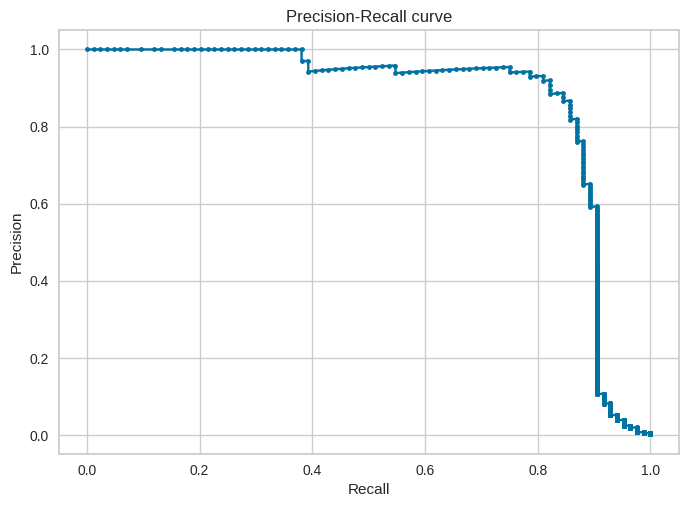

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Get probabilities for the positive class
y_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9906706408345752** --- Model is excellent at distinguishing between the positive and negative classes

### ROC Curve

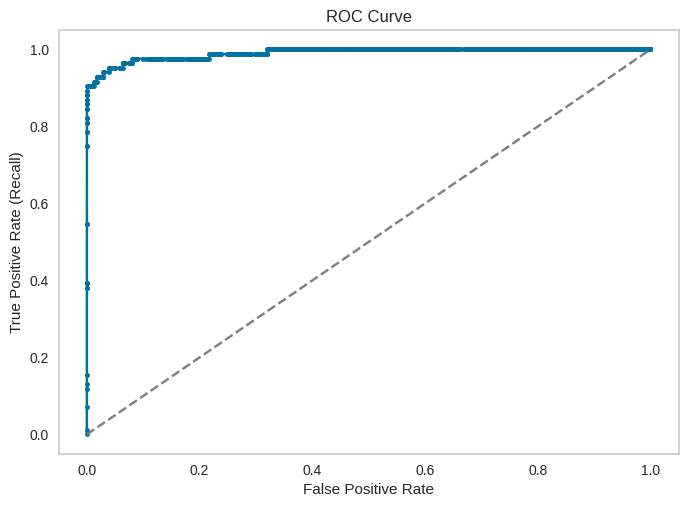

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### Confusion Matrix
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

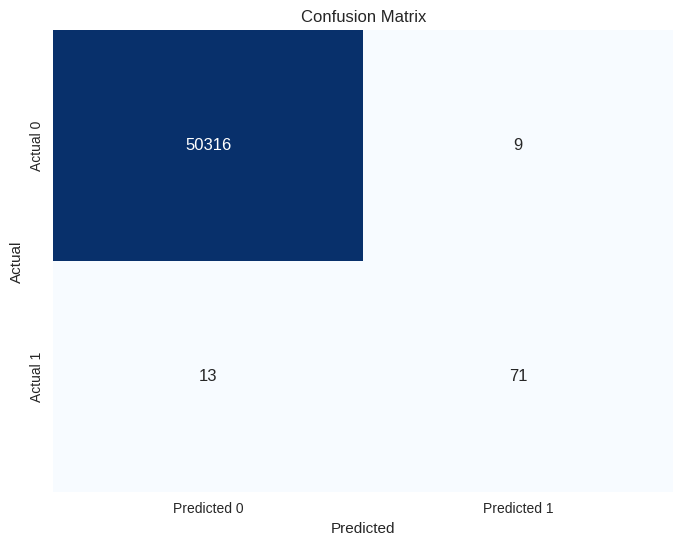

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50316): The model correctly predicted the negative class.
* False Positives (9): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (13): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (71): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

### **Feature Selection**

Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance
14     V14    0.214687
10     V10    0.126975
12     V12    0.107780
4       V4    0.104133
17     V17    0.087522
3       V3    0.078082
11     V11    0.055260
2       V2    0.045026
7       V7    0.034624
9       V9    0.027269
16     V16    0.023978
21     V21    0.015723
6       V6    0.012512
1       V1    0.008679
28     V28    0.007619
0     Time    0.006240
27     V27    0.006167
18     V18    0.006023
19     V19    0.003678
8       V8    0.003268
25     V25    0.002893
13     V13    0.002815
15     V15    0.002749
29  Amount    0.002688
5       V5    0.002621
22     V22    0.002521
26     V26    0.002501
20     V20    0.002072
24     V24    0.002004
23     V23    0.001892
Top 5 Features:
    Feature  Importance
14     V14    0.214687
10     V10    0.126975
12     V12    0.107780
4       V4    0.104133
17     V17    0.087522


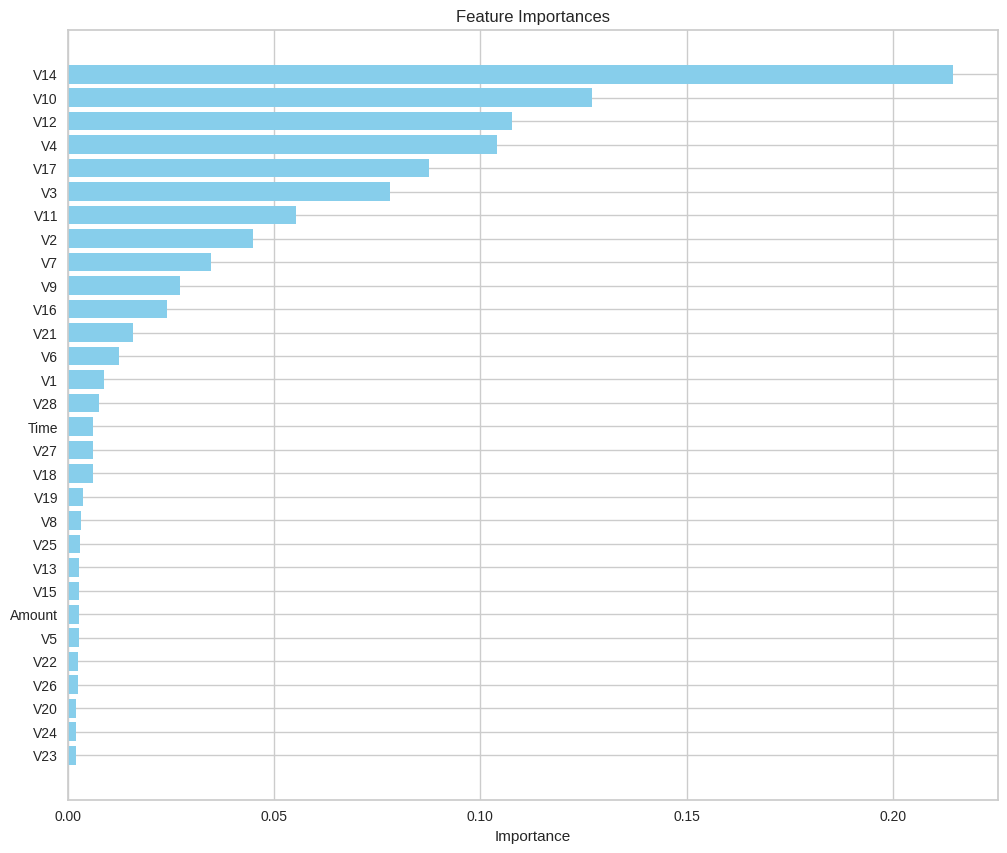

In [ ]:
# Feature selection based on feature importances
importances = rf_model.feature_importances_
feature_names = X.columns  # Use actual feature names if X is a DataFrame

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### **Hyperparameter Tuning**

After building the model, we perform hyperparameter tuning to enhance model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.96      0.82      0.88        84

    accuracy                           1.00     50409
   macro avg       0.98      0.91      0.94     50409
weighted avg       1.00      1.00      1.00     50409

Best Model ROC AUC Score: 0.9720643200151396


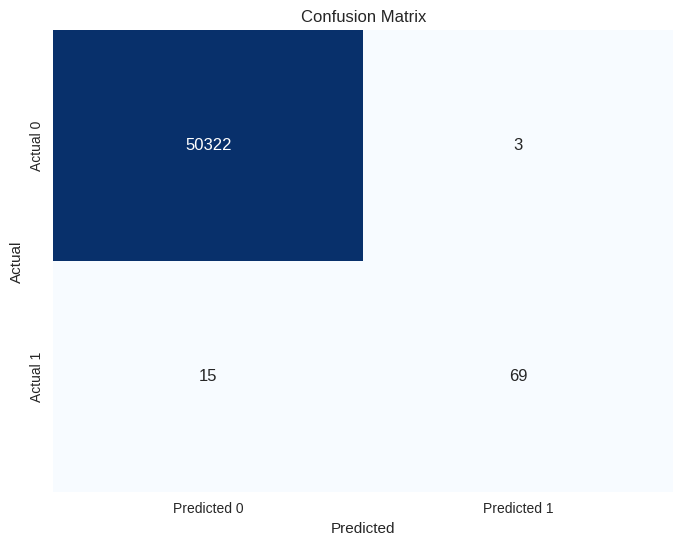

In [ ]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50322): The model correctly predicted the negative class.
* False Positives (3): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (15): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (69): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

As we can predict from the classification report, the model performance is enhanced after hyperparameter tuning.

## **Model 2 - Extreme Gradient Boosting**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled_scaled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
# Make predictions on the resampled training set
y_train_pred = xgb_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    201330
           1       1.00      1.00      1.00    201330

    accuracy                           1.00    402660
   macro avg       1.00      1.00      1.00    402660
weighted avg       1.00      1.00      1.00    402660

Training Confusion Matrix:
 [[201330      0]
 [     0 201330]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.87      0.87      0.87        84

    accuracy                           1.00     50409
   macro avg       0.93      0.93      0.93     50409
weighted avg       1.00      1.00      1.00     50409

Testing Confusion Matrix:
 [[50314    11]
 [   11    73]]


In [ ]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  1.0
Training Precision :  1.0
Training Recall Score :  1.0


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9995635699974211
Testing Precision :  0.8690476190476191
Testing Recall Score :  0.8690476190476191


Here, we can see, the model is performing well on unseen data, however there is scope for improvement. In order to enhance our model performance, we will perform Threshold Tuning.

### **Threshold Adjustment**
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class.

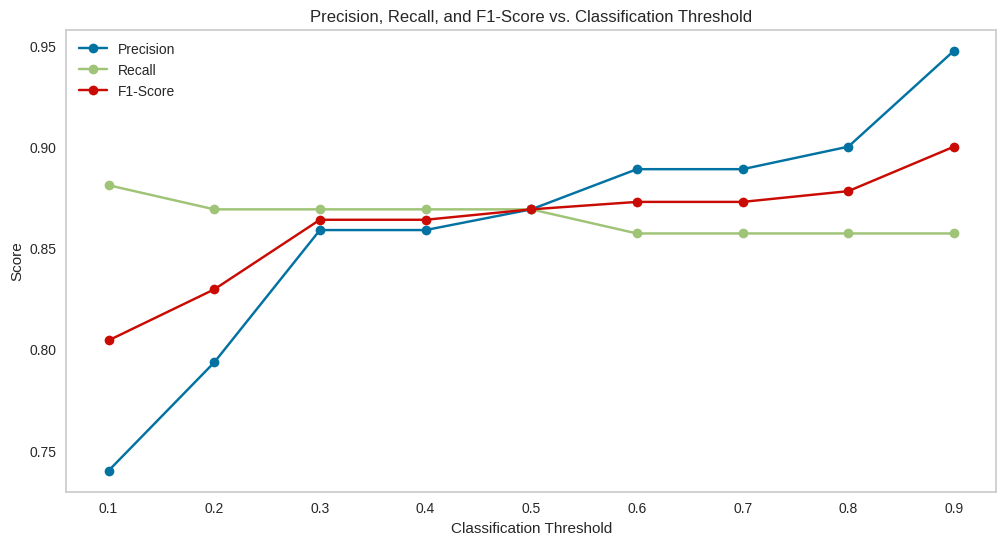

Best threshold based on F1-score: 0.9
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.95      0.86      0.90        84

    accuracy                           1.00     50409
   macro avg       0.97      0.93      0.95     50409
weighted avg       1.00      1.00      1.00     50409



In [ ]:
# Get predicted probabilities for the test set
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Perform threshold adjustment
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

The performace has significantly increased.

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9996825963617608
Testing Precision :  0.9473684210526315
Testing Recall Score :  0.8571428571428571


### **Precision - Recall Curve**
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9842991980696899


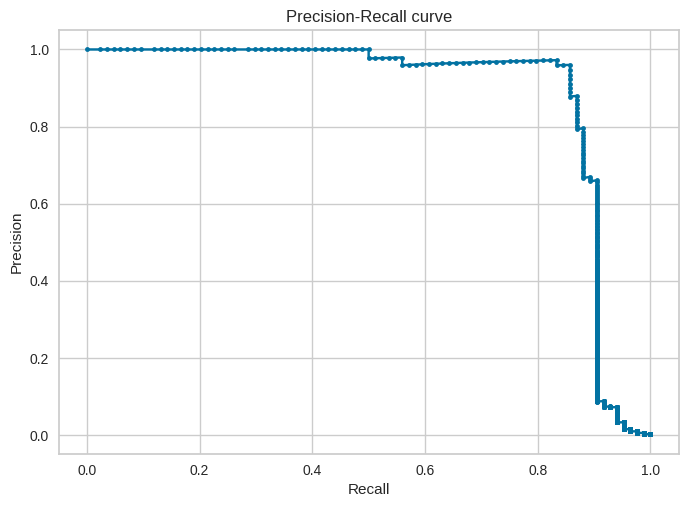

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Get probabilities for the positive class
y_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9870670658527901** --- Model is excellent at distinguishing between the positive and negative classes

### **ROC Curve**

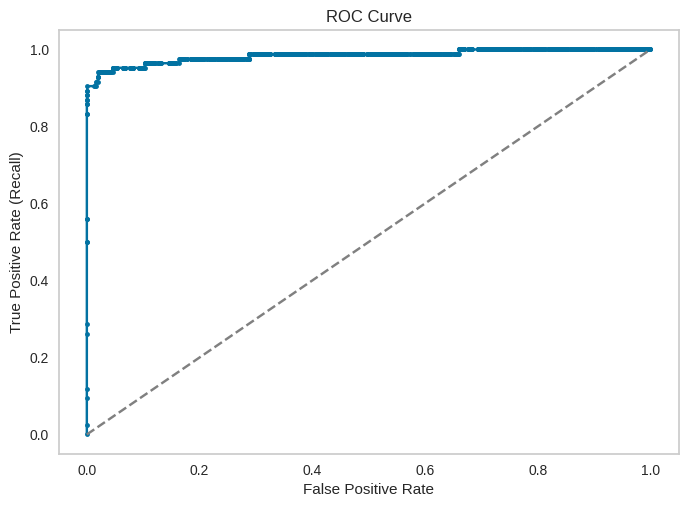

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### **Confusion Matrix**
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

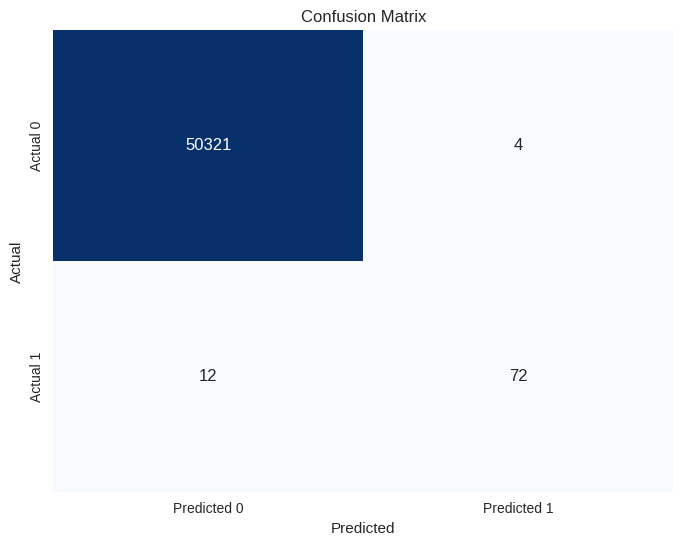

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50321): The model correctly predicted the negative class.
* False Positives (4): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (12): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (72): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

### **Feature Selection**
Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance
14     V14    0.699426
17     V17    0.043244
12     V12    0.036172
4       V4    0.034623
3       V3    0.017850
1       V1    0.015369
5       V5    0.013476
28     V28    0.011577
7       V7    0.009166
0     Time    0.009139
6       V6    0.008361
10     V10    0.008270
11     V11    0.007159
8       V8    0.006654
25     V25    0.006375
15     V15    0.006258
9       V9    0.006138
16     V16    0.005972
29  Amount    0.005932
22     V22    0.005752
26     V26    0.005573
23     V23    0.005205
21     V21    0.005162
2       V2    0.005058
19     V19    0.004701
13     V13    0.004484
18     V18    0.004373
24     V24    0.003623
27     V27    0.002611
20     V20    0.002299
Top 5 Features:
    Feature  Importance
14     V14    0.699426
17     V17    0.043244
12     V12    0.036172
4       V4    0.034623
3       V3    0.017850


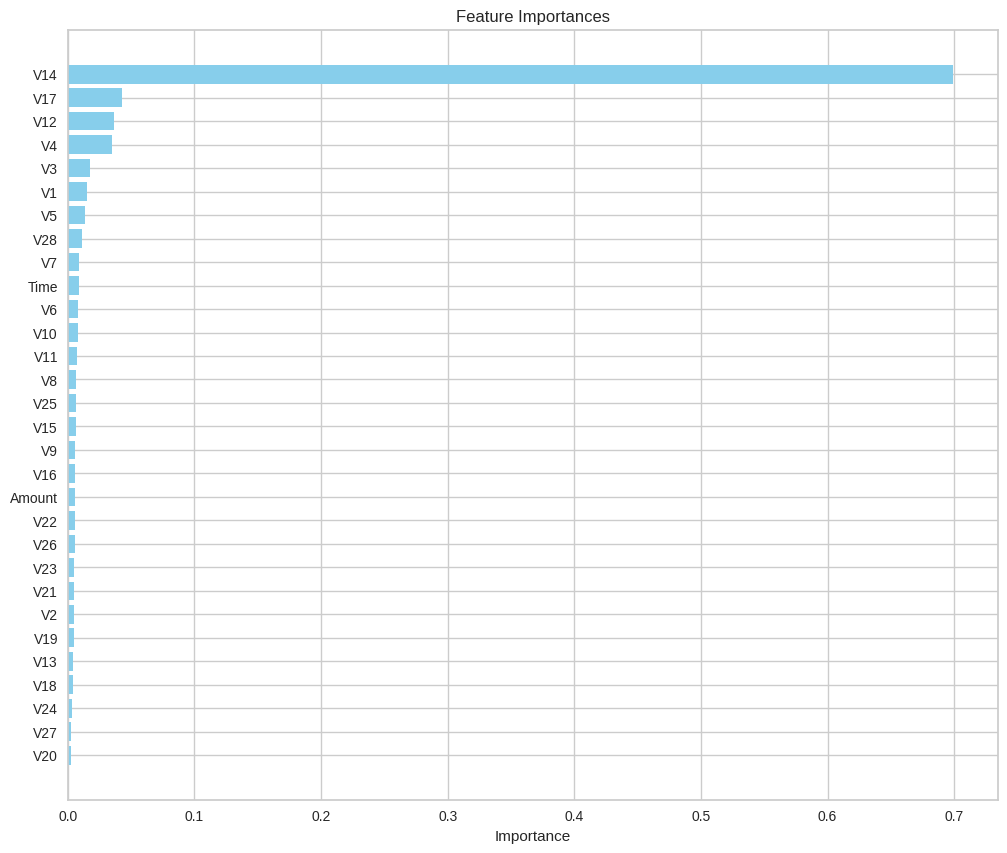

In [ ]:
# Feature selection based on feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns  # Use actual feature names if X is a DataFrame

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### **Hyperparameter Tuning**
Perform Hyperparameter Tuning on threshold adjusted data to check the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.94      0.86      0.89        84

    accuracy                           1.00     50409
   macro avg       0.97      0.93      0.95     50409
weighted avg       1.00      1.00      1.00     50409

Best Model ROC AUC Score: 0.9871719537293308


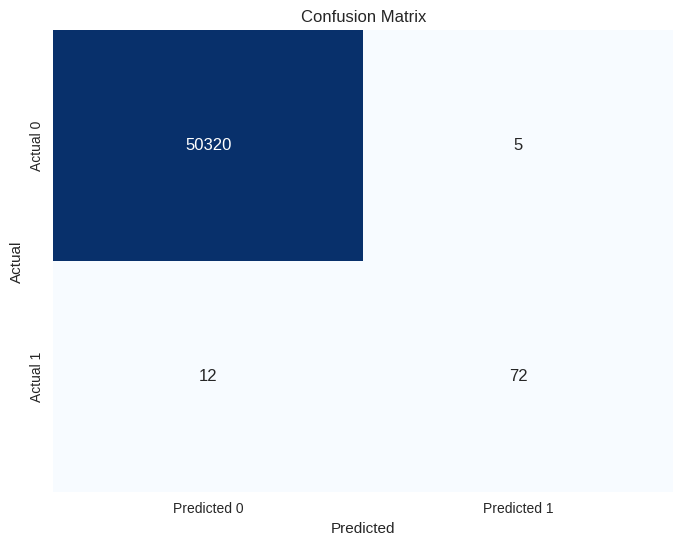

In [ ]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Previous Confusion Matrix was slightly better

## **Model 3 - Extra Trees Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier
etc_model= ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=3, random_state=42)
etc_model.fit(X_resampled_scaled, y_resampled)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=10, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=3, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [ ]:
# Make predictions on the resampled training set
y_train_pred = etc_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = etc_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    201330
           1       1.00      0.93      0.96    201330

    accuracy                           0.96    402660
   macro avg       0.96      0.96      0.96    402660
weighted avg       0.96      0.96      0.96    402660

Training Confusion Matrix:
 [[201067    263]
 [ 14813 186517]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.56      0.89      0.68        84

    accuracy                           1.00     50409
   macro avg       0.78      0.95      0.84     50409
weighted avg       1.00      1.00      1.00     50409

Testing Confusion Matrix:
 [[50265    60]
 [    9    75]]


In [ ]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9625589827646153
Training Precision :  0.9985919263304422
Training Recall Score :  0.9264242785476581


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9986311968100935
Testing Precision :  0.5555555555555556
Testing Recall Score :  0.8928571428571429


Here, we can see, the model is performing not so well on unseen data, however there is scope for improvement. In order to enhance our model performance, we will perform Threshold Tuning.

### **Threshold Adjustment**
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class and help enhance the performance of the model.

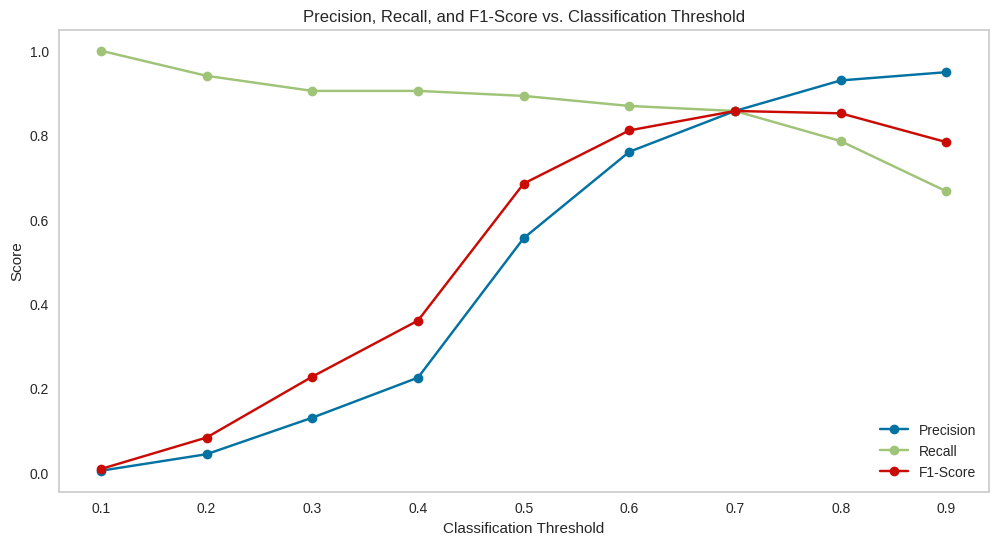

Best threshold based on F1-score: 0.7000000000000001
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.86      0.86      0.86        84

    accuracy                           1.00     50409
   macro avg       0.93      0.93      0.93     50409
weighted avg       1.00      1.00      1.00     50409



In [ ]:
# Get predicted probabilities for the test set
y_probs = etc_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    # Evaluate the model
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
import pandas as pd

results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

Print the test metrics after performing Threshold adjustment

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9995238945426412
Testing Precision :  0.8571428571428571
Testing Recall Score :  0.8571428571428571


The performace has significantly increased.

### **Precision - Recall Curve**
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9922113405719963


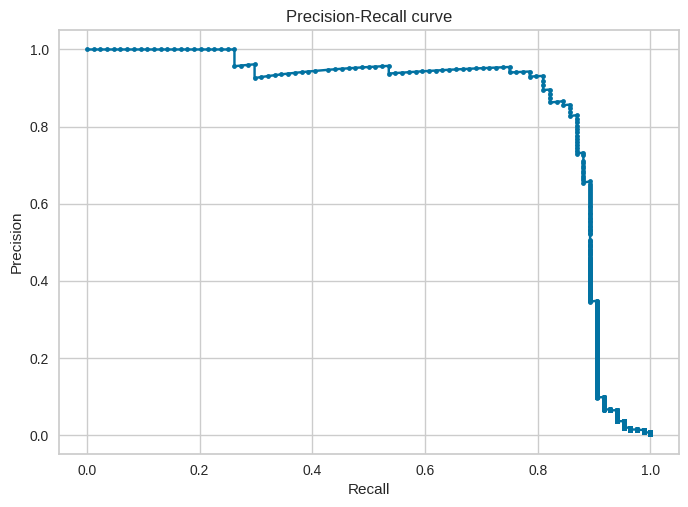

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Get probabilities for the positive class
y_probs = etc_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9814792616540144** --- Model is excellent at distinguishing between the positive and negative classes

### **ROC Curve**

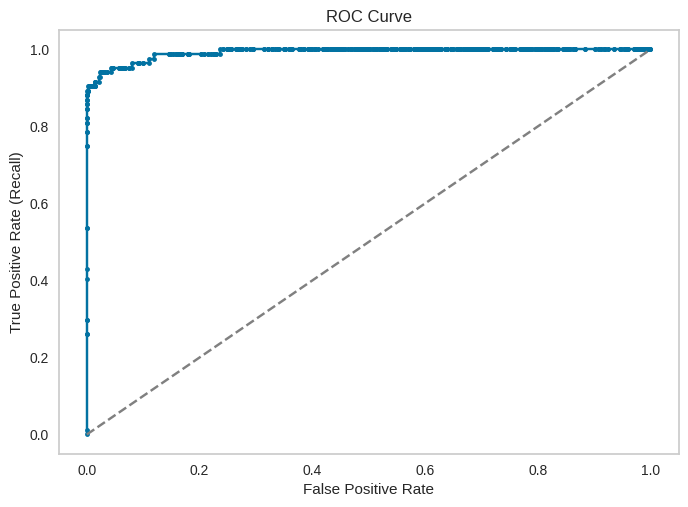

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### **Confusion Matrix**
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

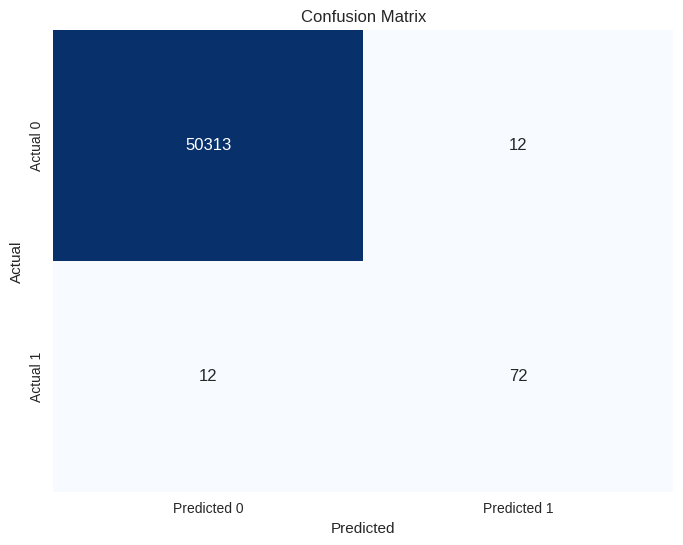

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50313): The model correctly predicted the negative class.
* False Positives (12): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (12): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (72): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

### **Feature Selection**
Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance
14     V14    0.163760
12     V12    0.139230
11     V11    0.104550
4       V4    0.102188
3       V3    0.089872
16     V16    0.070972
10     V10    0.070588
17     V17    0.066334
7       V7    0.042474
18     V18    0.024384
9       V9    0.023587
1       V1    0.014249
2       V2    0.014117
21     V21    0.011720
27     V27    0.009002
19     V19    0.008722
20     V20    0.006840
5       V5    0.006503
6       V6    0.006126
0     Time    0.005062
8       V8    0.005043
29  Amount    0.003071
25     V25    0.002112
24     V24    0.002004
13     V13    0.001838
26     V26    0.001771
22     V22    0.001481
15     V15    0.001019
23     V23    0.000836
28     V28    0.000542
Top 5 Features:
    Feature  Importance
14     V14    0.163760
12     V12    0.139230
11     V11    0.104550
4       V4    0.102188
3       V3    0.089872


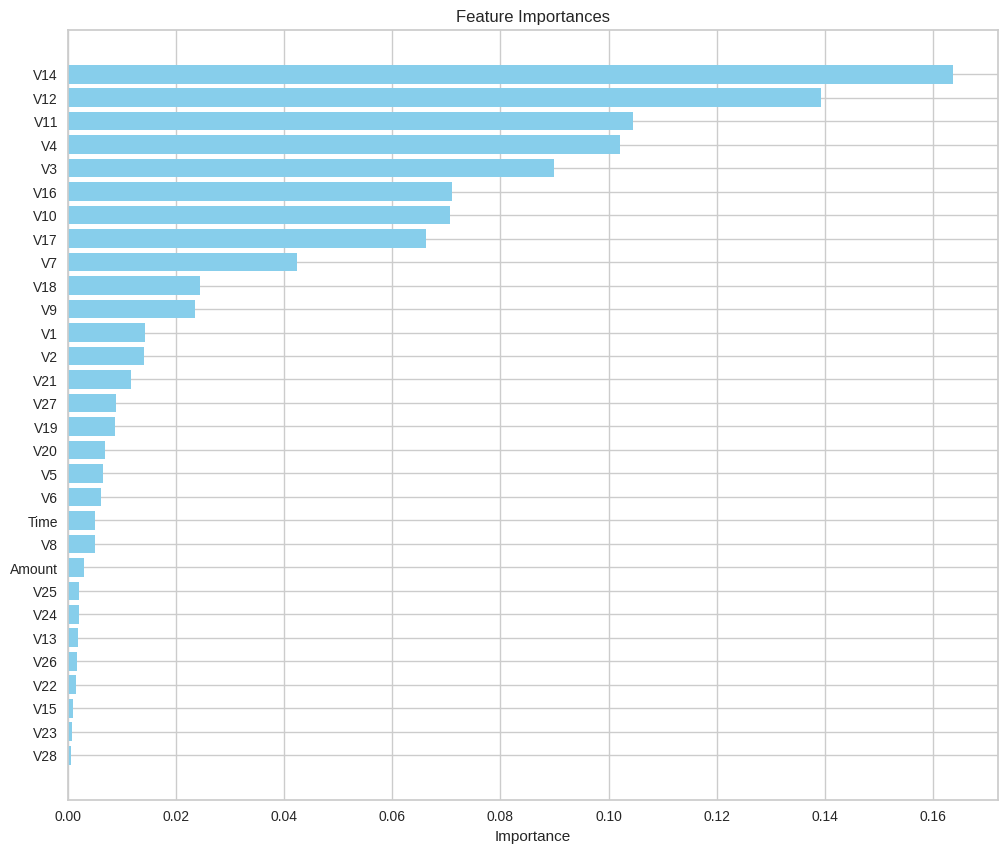

In [ ]:
# Feature selection based on feature importances
importances = etc_model.feature_importances_
feature_names = X.columns  # Use actual feature names if X is a DataFrame

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### **Hyperparameter Tuning**
Perform Hyperparameter Tuning on threshold adjusted data to check the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=etc_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_extra_trees_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_extra_trees_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.99      0.82      0.90        84

    accuracy                           1.00     50409
   macro avg       0.99      0.91      0.95     50409
weighted avg       1.00      1.00      1.00     50409

Best Model ROC AUC Score: 0.9793172947271308


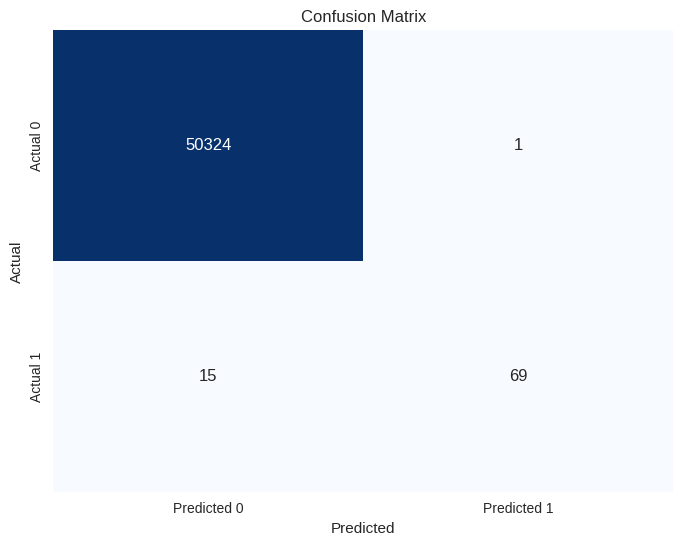

In [ ]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50324): The model correctly predicted the negative class.
* False Positives (1): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (15): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (69): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

## **Model 4 - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Random Forest Classifier
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_resampled_scaled, y_resampled)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions on the resampled training set
y_train_pred = lr_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    201330
           1       0.99      0.97      0.98    201330

    accuracy                           0.98    402660
   macro avg       0.98      0.98      0.98    402660
weighted avg       0.98      0.98      0.98    402660

Training Confusion Matrix:
 [[199669   1661]
 [  6978 194352]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     50325
           1       0.16      0.93      0.28        84

    accuracy                           0.99     50409
   macro avg       0.58      0.96      0.64     50409
weighted avg       1.00      0.99      0.99     50409

Testing Confusion Matrix:
 [[49920   405]
 [    6    78]]


In [ ]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9785451745889833
Training Precision :  0.99152607225031
Training Recall Score :  0.9653404857696319


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9918466940427305
Testing Precision :  0.16149068322981366
Testing Recall Score :  0.9285714285714286


Here, we can see, the model is **NOT performing** well on unseen data. Though, we are getting testing accuracy as 99%, but “high accuracy can be misleading in such cases with imbalanced data. It’s often advisable to consider additional metrics such as: Precision, Recall, F1 – Score and ROC value”.

In order to enhance our model performance, we will perform Threshold Tuning.

### **Threshold Adjustment**
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class and help enhance the performance of the model.

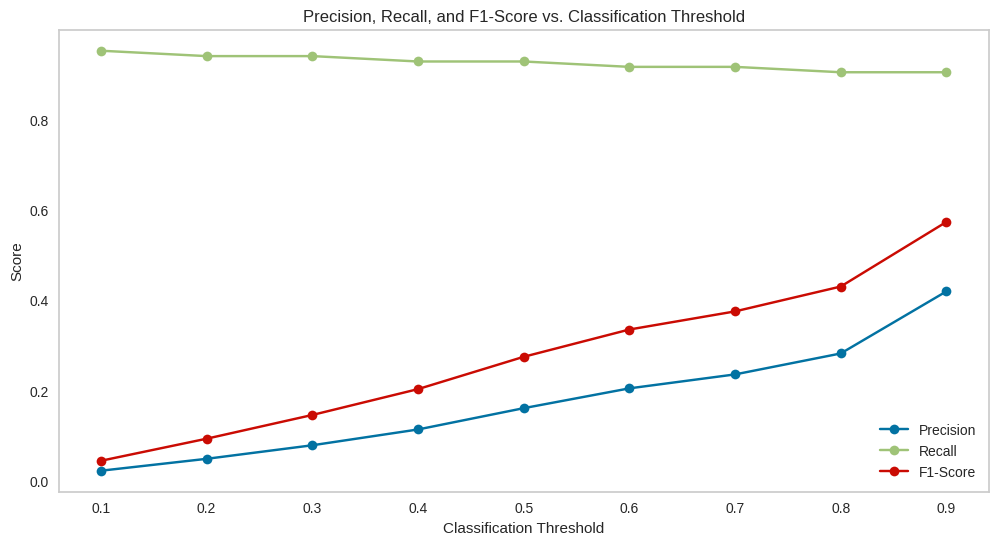

Best threshold based on F1-score: 0.9
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.42      0.90      0.57        84

    accuracy                           1.00     50409
   macro avg       0.71      0.95      0.79     50409
weighted avg       1.00      1.00      1.00     50409



In [ ]:
# Get predicted probabilities for the test set
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    # Evaluate the model
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
import pandas as pd

results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

The performace has significantly increased.

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9977583368049356
Testing Precision :  0.4198895027624309
Testing Recall Score :  0.9047619047619048


### **Precision - Recall Curve**
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9944271757386511


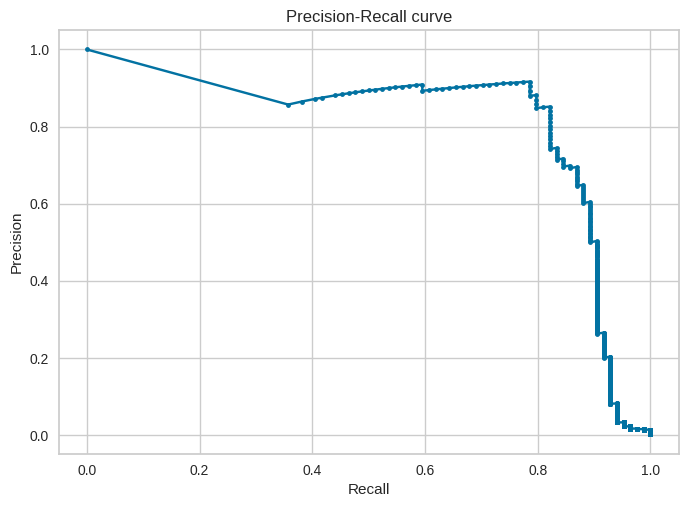

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Get probabilities for the positive class
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9944271757386511** --- Model is excellent at distinguishing between the positive and negative classes

### ROC Curve

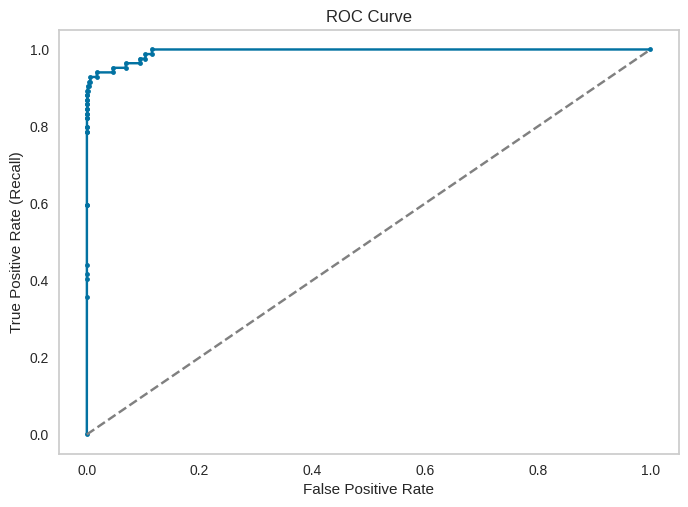

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### **Confusion Matrix**
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

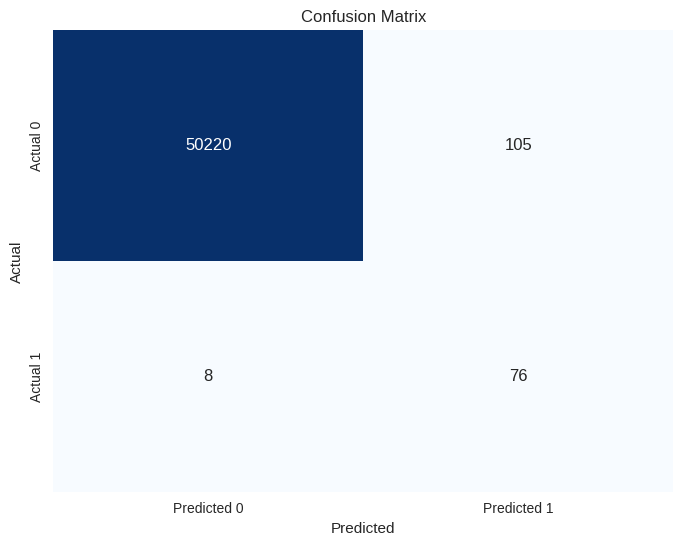

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50220): The model correctly predicted the negative class.
* False Positives (105): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (8): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (76): The model correctly predicted the positive class.

This logistic Regression model is not performing well for Fraud Detection case as the number of False Positives cases (105) are more than True Positives (76). This indicates that the model is predicting more instances as positive when they are actually negative, compared to correctly identifying positive instances.

### **Feature Selection**
Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance  Absolute Importance
14     V14   -9.037555             9.037555
17     V17   -8.491719             8.491719
12     V12   -6.265706             6.265706
10     V10   -4.801515             4.801515
1       V1    3.811794             3.811794
4       V4    2.957617             2.957617
8       V8   -2.388275             2.388275
7       V7   -2.174486             2.174486
11     V11    2.087846             2.087846
16     V16   -1.785783             1.785783
5       V5    1.319472             1.319472
9       V9   -1.198442             1.198442
3       V3    1.034482             1.034482
18     V18   -0.860024             0.860024
28     V28    0.760640             0.760640
2       V2   -0.649558             0.649558
21     V21    0.561285             0.561285
0     Time   -0.552654             0.552654
6       V6   -0.548982             0.548982
19     V19    0.490864             0.490864
27     V27    0.466291             0.466291
13     V13

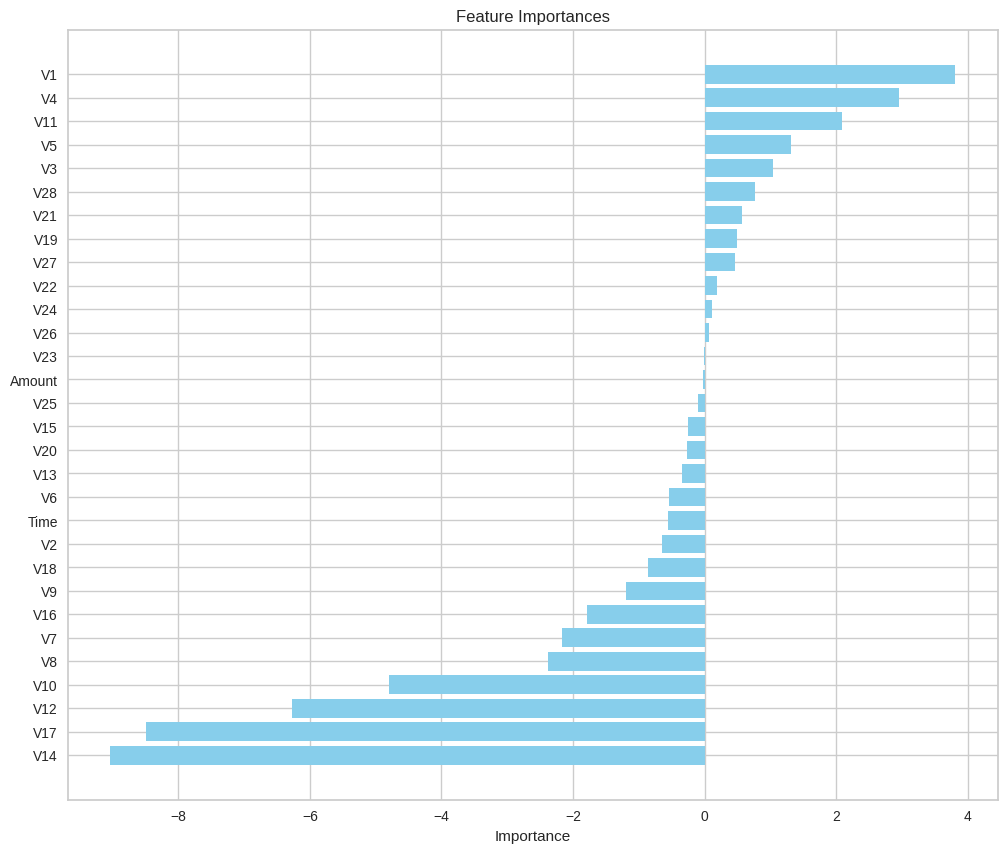

In [ ]:
# Feature selection based on feature importances
importance = lr_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### **Hyperparameter Tuning**
Perform Hyperparameter Tuning on threshold adjusted data to check the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Set up the hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_lr_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 4.281332398719396}

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.42      0.90      0.58        84

    accuracy                           1.00     50409
   macro avg       0.71      0.95      0.79     50409
weighted avg       1.00      1.00      1.00     50409

Best Model ROC AUC Score: 0.9944322617273438


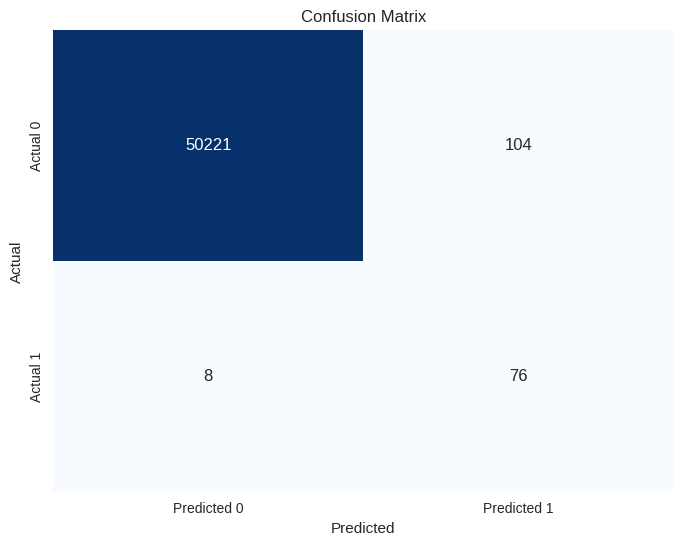

In [ ]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50221): The model correctly predicted the negative class.
* False Positives (104): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (8): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (76): The model correctly predicted the positive class.

This logistic Regression model is not performing well for Fraud Detection case as the number of False Positives cases (104) are more than True Positives (76). This indicates that the model is predicting more instances as positive when they are actually negative, compared to correctly identifying positive instances.

## **Model 5 - Light Gradient Boosting Model**

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier( n_estimators=100, max_depth=5, random_state=42)
lgb_model.fit(X_resampled_scaled, y_resampled)

[LightGBM] [Info] Number of positive: 201330, number of negative: 201330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.385516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 402660, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=None, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Make predictions on the resampled training set
y_train_pred = lgb_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = lgb_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    201330
           1       1.00      1.00      1.00    201330

    accuracy                           1.00    402660
   macro avg       1.00      1.00      1.00    402660
weighted avg       1.00      1.00      1.00    402660

Training Confusion Matrix:
 [[201150    180]
 [   212 201118]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.51      0.88      0.65        84

    accuracy                           1.00     50409
   macro avg       0.76      0.94      0.82     50409
weighted avg       1.00      1.00      1.00     50409

Testing Confusion Matrix:
 [[50254    71]
 [   10    74]]


In [ ]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9990264739482442
Training Precision :  0.9991058033363471
Training Recall Score :  0.9989470024338152


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.998393144081414
Testing Precision :  0.5103448275862069
Testing Recall Score :  0.8809523809523809


Here, we can see, the model is not performing well on unseen data, however there is scope for improvement. In order to enhance our model performance, we will perform Threshold Tuning.

### **Threshold Adjustment**
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class.

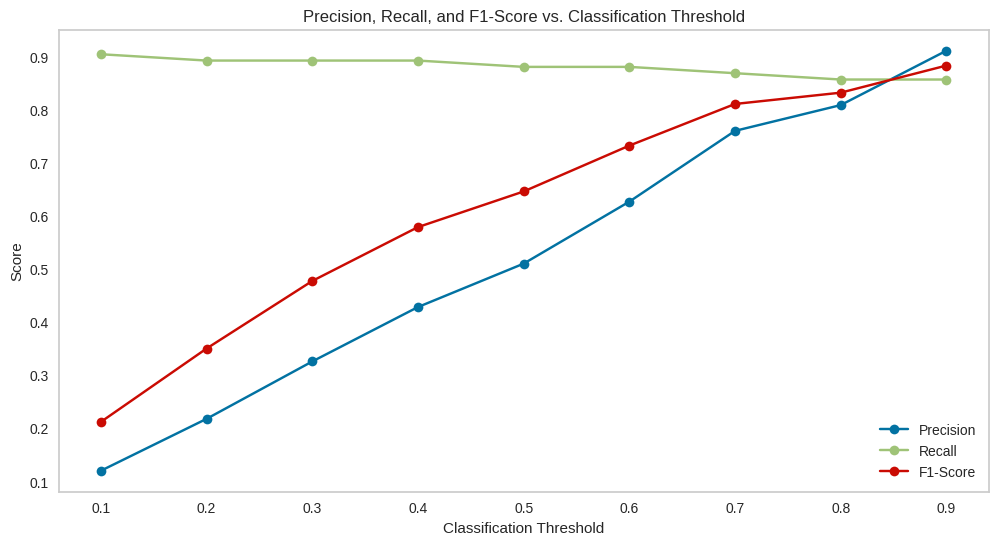

Best threshold based on F1-score: 0.9
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.91      0.86      0.88        84

    accuracy                           1.00     50409
   macro avg       0.96      0.93      0.94     50409
weighted avg       1.00      1.00      1.00     50409



In [ ]:
# Get predicted probabilities for the test set
y_probs = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    # Evaluate the model
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
import pandas as pd

results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

Print the test metrics after performing Threshold adjustment

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9996230831795909
Testing Precision :  0.9113924050632911
Testing Recall Score :  0.8571428571428571


The performace has significantly increased.

### **Precision - Recall Curve**
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9874778227237244


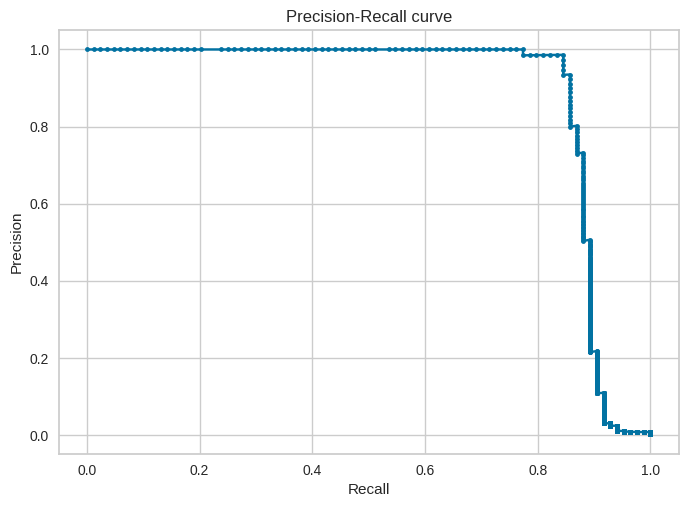

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Step 1: Get probabilities for the positive class
y_probs = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Step 2: Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Step 3: Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 4: Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9874778227237244** --- Model is excellent at distinguishing between the positive and negative classes

### **ROC Curve**

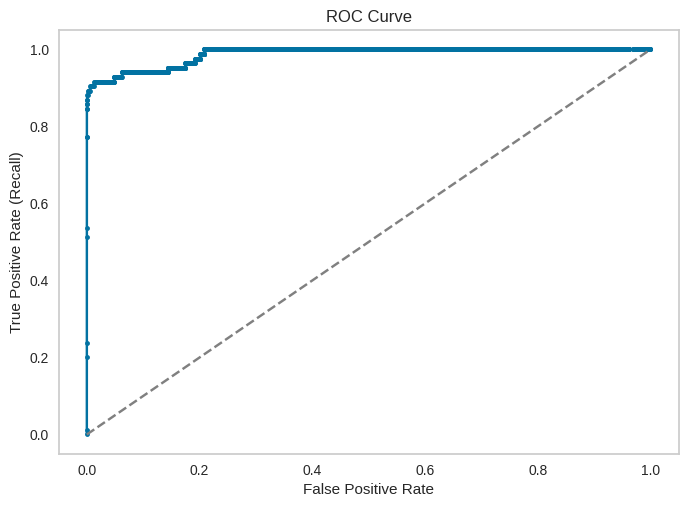

In [ ]:
from sklearn.metrics import roc_curve

# Step 1: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 2: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### **Confusion Matrix**
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

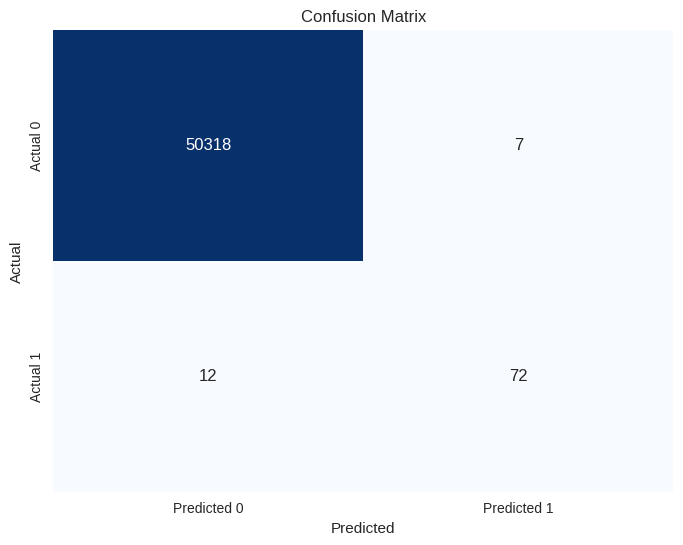

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50318): The model correctly predicted the negative class.
* False Positives (7): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (12): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (72): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

### **Feature Selection**
Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance
4       V4         265
14     V14         262
0     Time         174
12     V12         173
7       V7         166
10     V10         162
17     V17         126
3       V3         106
11     V11         105
16     V16         103
21     V21         102
1       V1         101
26     V26          93
15     V15          92
28     V28          89
19     V19          81
29  Amount          80
25     V25          74
22     V22          57
2       V2          56
6       V6          52
5       V5          51
24     V24          51
18     V18          47
13     V13          46
9       V9          45
23     V23          43
8       V8          40
27     V27          38
20     V20          34
Top 5 Features:
    Feature  Importance
4       V4         265
14     V14         262
0     Time         174
12     V12         173
7       V7         166


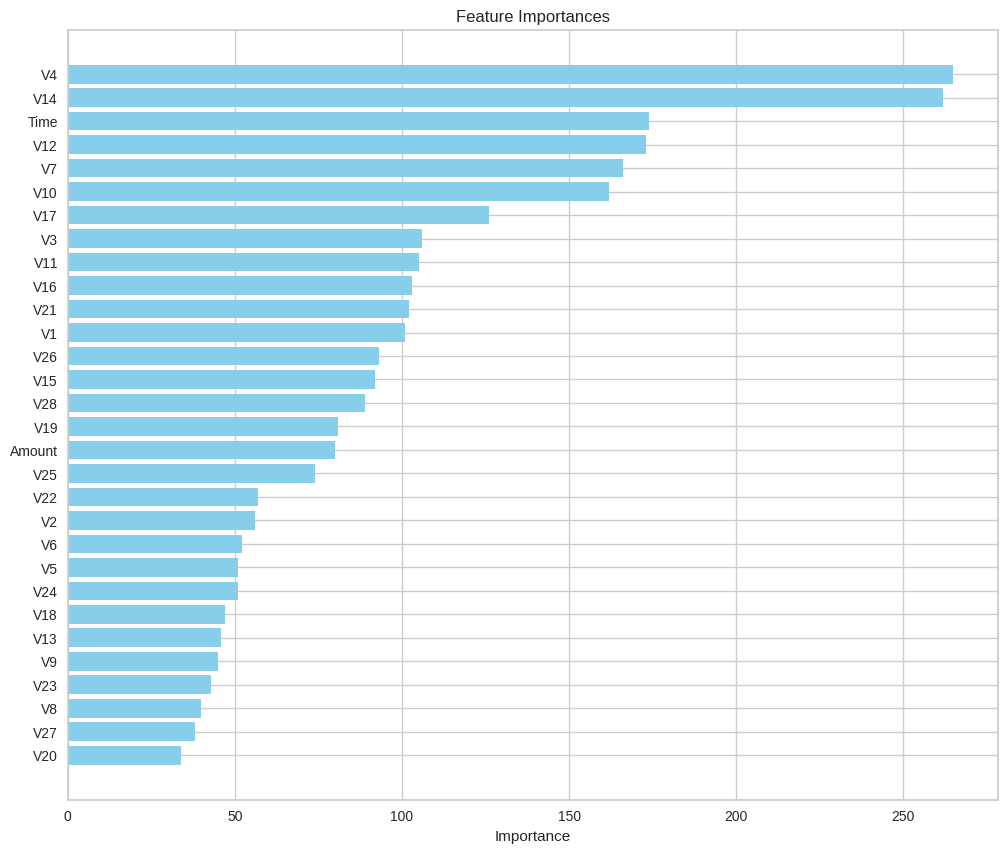

In [ ]:
# Feature selection based on feature importances
importances = lgb_model.feature_importances_
feature_names = X.columns  # Use actual feature names if X is a DataFrame

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

### **Hyperparameter Tuning**
Perform Hyperparameter Tuning on threshold adjusted data to check the performance of the model.

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
     'boosting_type': ['gbdt'],  # Focus on one boosting type
    'objective': ['binary'],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'lambda_l1': [0, 0.1],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_lgb_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_lgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Number of positive: 201330, number of negative: 201330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.215679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 402660, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Plot confusion matrix again after hyperparameter tuning.

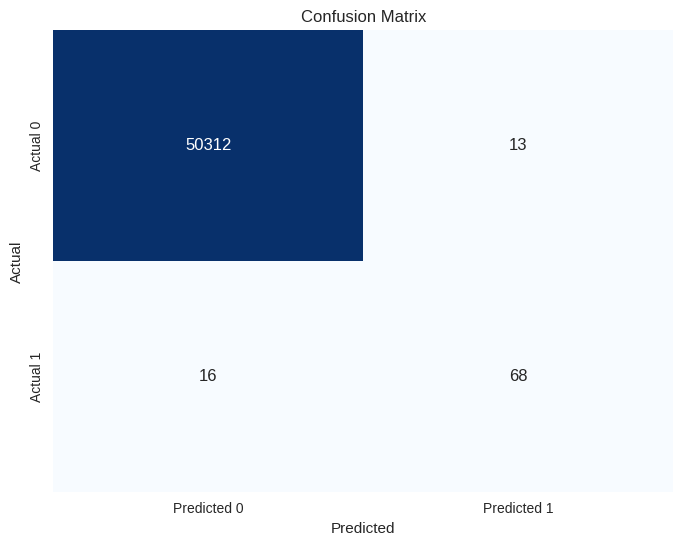

In [100]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (50312): The model correctly predicted the negative class.
* False Positives (13): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (16): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (68): The model correctly predicted the positive class.

In summary, this confusion matrix would reflect very high numbers of true negatives and true positives but relatively much smaller numbers for the false positives and false negatives, which might indicate that it is doing pretty well in telling the difference between the two classes.

# **11. Conclusion**


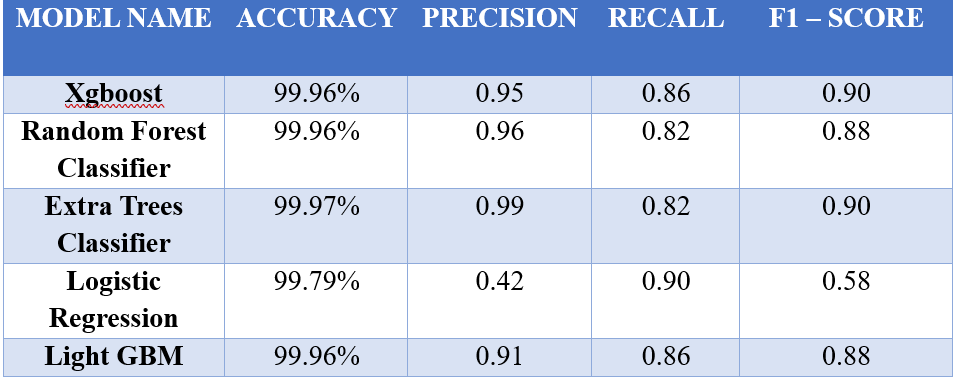



When dealing with imbalanced data, we should NOT be solely depending on Accuracy, as high accuracy can be misleading in such cases. It’s often advisable to consider additional metrics such as: Precision, Recall, F1 – Score and ROC value.
* The best models among these 5 would be Extreme Gradient Boosting and Extra Trees Classifier Model as both have the highest F1 – Score (90%).

* The least fit model among these 5, for this project will be Logistic Regression. Though Logistic Regression is having high accuracy (99.79%), but it has precision less than 50%. The model correctly identifies 90% of the actual positive instances that are within Class 1, which is a good recall score. The problem, though is precision. This means some of those predictions cannot be relied upon.

